In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
data=nc.Dataset('/ihesp/shared/xiliang/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.nday1.PREC_F.033801_051212.nc')

In [3]:
plotvar3 = data.variables['PREC_F']#[9:5760:12,200:600,550:1500]

In [4]:
pl = plotvar3[:,603:808,550:1500]

In [5]:
plot1 = np.nanmean(pl, axis = 1)
aveplotnew = np.nanmean(plot1,axis=1)

In [6]:
result1 = np.zeros((84))
i = 0

In [7]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(331,338)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/scratch/user/xiliangdiao/figures/PREC_F_B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.nc')
        plotvar = data.variables['PREC_F'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        lont = lont[603:808,550:1500]
        latt = latt[603:808,550:1500]
        plot1 = plotvar[603:808,550:1500]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = np.nanmean(plot1,axis=0)
    
        result1[i] = aveplot
        i = i + 1

In [11]:
result2 = np.zeros((2160))
i = 0

In [12]:
180*12

2160

In [15]:
months = [f"{x:02d}" for x in range(1,13)]
years = [f"{x:04d}" for x in range(151,331)]
i =0
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.PRECmid.nc')
        plotvar = data.variables['PREC_F'][0,:,:]
        plotvar[plotvar == -1.0] = np.nan
        lont = data.variables['TLONG']
        latt = data.variables['TLAT']
        #lont = lont[603:808,550:1500]
        #latt = latt[603:808,550:1500]
        plot1 = plotvar[:,550:1500]
        plot1 = np.nanmean(plot1, axis = 0)
        aveplot = np.nanmean(plot1,axis=0)
    
        result2[i] = aveplot
        i = i + 1

In [16]:
lala = np.hstack((result2,result1))

In [17]:
lal = np.hstack((lala,aveplotnew))

In [18]:
ww2 = np.convolve(lal, np.ones((60,))/60, mode='valid')

In [19]:
mean = np.mean(ww2)

In [20]:
ww2.shape

(4283,)

ValueError: operands could not be broadcast together with shapes (2039,) (4283,) 

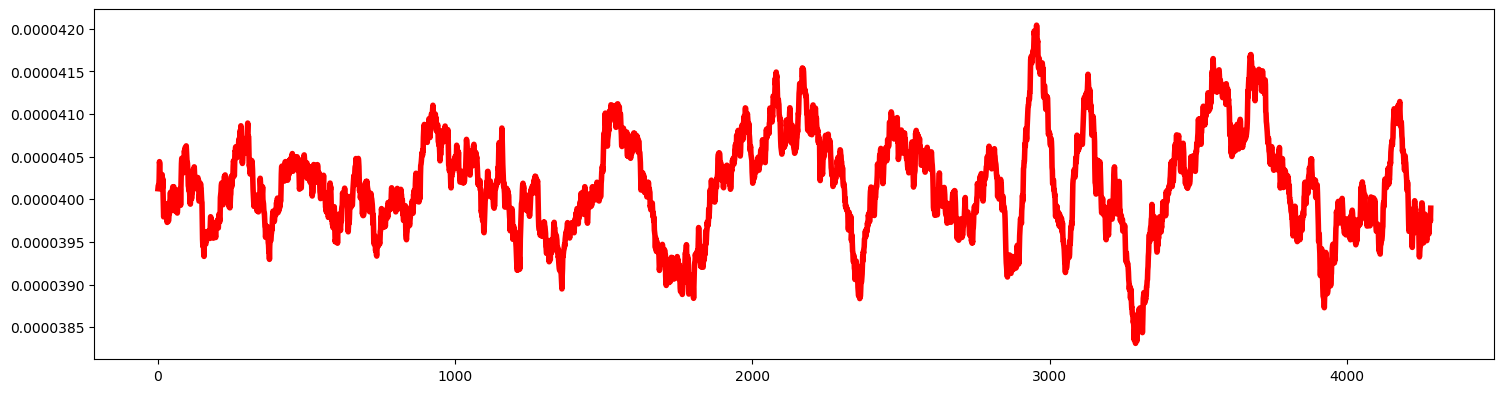

In [21]:
t = np.arange(0,2039,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'red',linewidth=4)
ax0.fill_between(t,mean,ww2,where=ww2 > mean,facecolor='purple', alpha=1)
plt.hlines(mean, 0, 2039, colors = "red",linestyles = "dashed")
#plt.xticks(range(0,2040,240), ['340','360',\
                            #'380','400','420', '440', '460','480','500'],**my_font)
plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.yticks(np.arange(-0.6,0.6,0.2), ['-0.6', '-0.4', '-0.2', '0','0.2','0.4','0.6'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Precipitation (kg/m$^2$/s)',**my_font)
plt.axis("tight")
#ax0.set(ylim=(0.000014, 0.000024),xlim=(0, 4170))
ax0.set_title('Precipitation Averaged over the Weddell Sea (55$^\circ$W - 40$^\circ$E, 50$^\circ$S - 70$^\circ$S)',**my_font)
#plt.savefig("Precipitation2.png",bbox_inches='tight',dpi=fig.dpi)

In [10]:
2039/12

169.91666666666666